# DIOMIRA Kublai

## Running DIOMIRA NB

In [1]:
from __future__ import print_function
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cProfile

In [2]:
import pandas as pd
import tables as tb
import numpy as np
from Util import *
import time

In [3]:
%matplotlib inline

In [14]:
import mplFunctions as mpl
import wfmFunctions as wfm

In [4]:
print(time.strftime("%d/%m/%Y"))

29/09/2016


In [5]:
print(time.strftime("%H:%M:%S"))

15:06:53


## Running Diomira

### Python version

In [6]:
%less ../../Config/DIOMIRA_NA_ZLIB_test2.csv

In [8]:
%run ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv 

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_twf10_RWF.h5
first event = 0 last event = 10 nof events requested = 10 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 
lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000
INFO:root:-->event number =0


-->event number =0


INFO:root:-->event number =1


-->event number =1


INFO:root:-->event number =2


-->event number =2


INFO:root:-->event number =3


-->event number =3


INFO:root:-->event number =4


-->event number =4


INFO:root:-->event number =5


-->event number =5


INFO:root:-->event number =6


-->event number =6


INFO:root:-->event number =7


-->event number =7


INFO:root:-->event number =8


-->event number =8


INFO:root:-->event number =9


-->event number =9


Leaving Diomira. Safe travels!


### Checking file

In [9]:
%ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5'

-rw-r--r--  1 jjgomezcadenas  staff    10M Sep 29 15:09 /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5


Abou 1 M per event!

In [10]:
h5f =tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5')

In [11]:
h5f

File(filename=/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_twf10_RWF.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=1, complib='zlib', shuffle=True, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/Detector (Group) ''
/Detector/DetectorGeometry (Table(1,)) ''
  description := {
  "x_det": Float64Col(shape=(2,), dflt=0.0, pos=0),
  "y_det": Float64Col(shape=(2,), dflt=0.0, pos=1),
  "z_det": Float64Col(shape=(2,), dflt=0.0, pos=2),
  "r_det": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (1170,)
/MC (Group) ''
/MC/FEE (Table(1,)) 'EP-FEE parameters'
  description := {
  "offset": Int16Col(shape=(), dflt=0, pos=0),
  "pmt_gain": Float32Col(shape=(), dflt=0.0, pos=1),
  "V_gain": Float32Col(shape=(), dflt=0.0, pos=2),
  "R": Float32Col(shape=(), dflt=0.0, pos=3),
  "C12": Float32Col(shape=(12,), dflt=0.0, pos=4),
  "AC": Float32Col(shape=(12,), dflt=0.0, pos=5),
  "time_step": Float32Col

In [12]:
pmtrwf = h5f.root.RD.pmtrwf

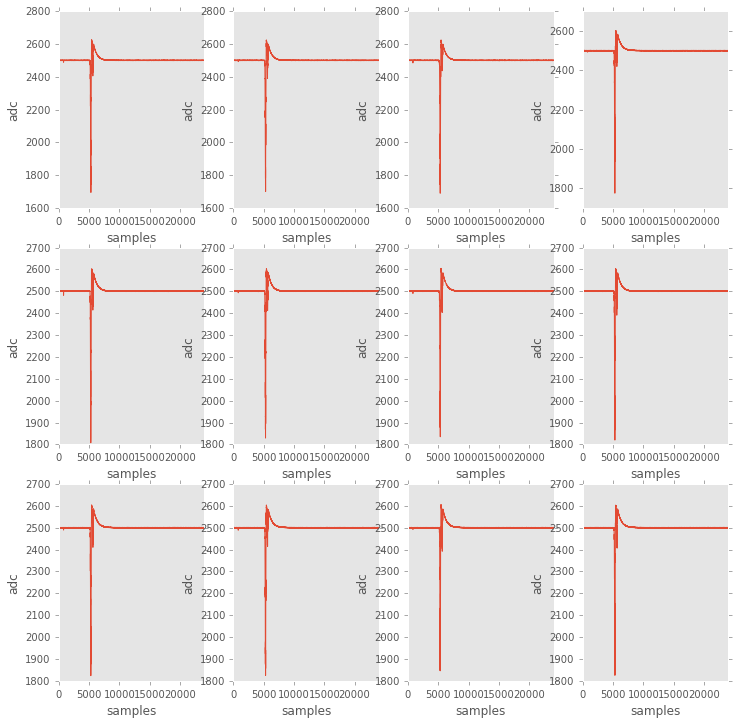

Press a key...


In [15]:
mpl.scan_waveforms(pmtrwf,list_of_events=[0])

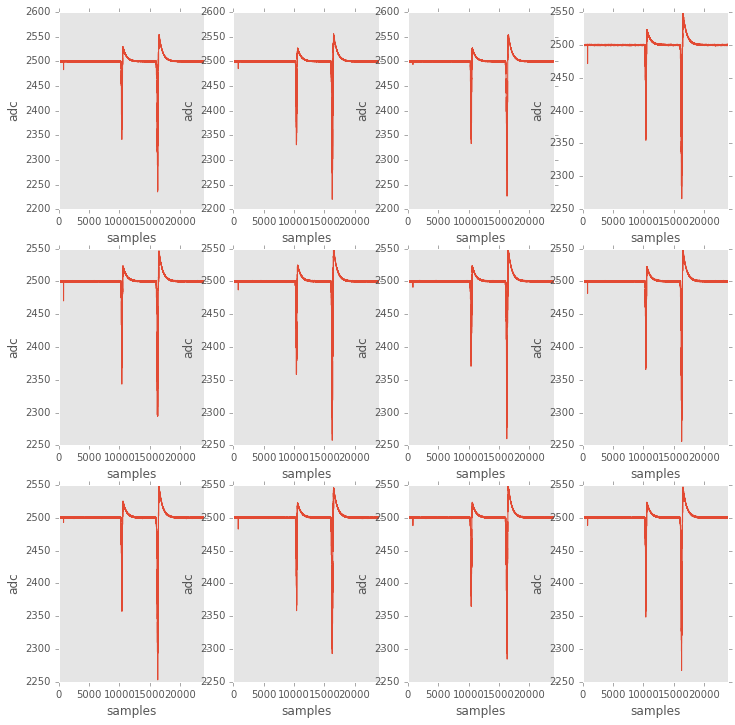

Press a key...


In [19]:
mpl.scan_waveforms(pmtrwf,list_of_events=[3])

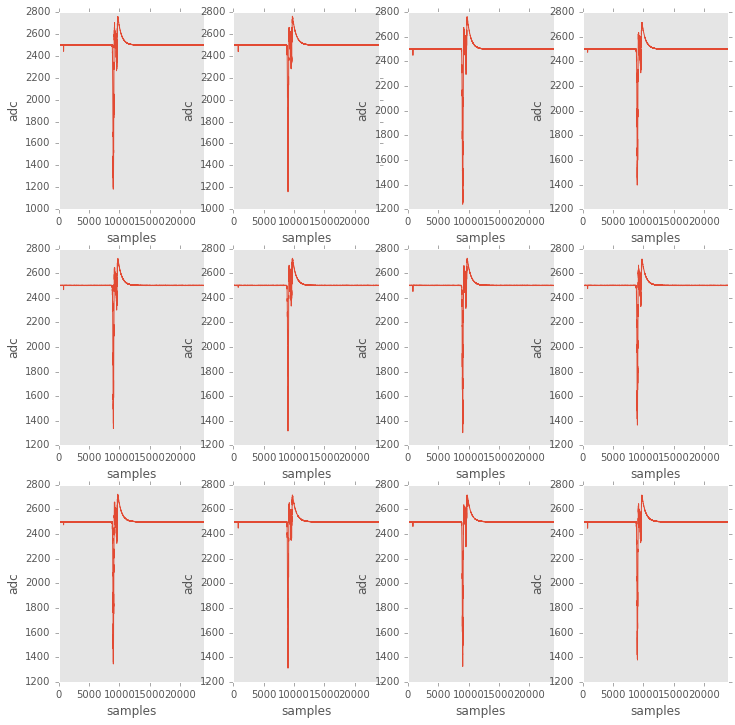

Press a key...


In [20]:
mpl.scan_waveforms(pmtrwf,list_of_events=[2])

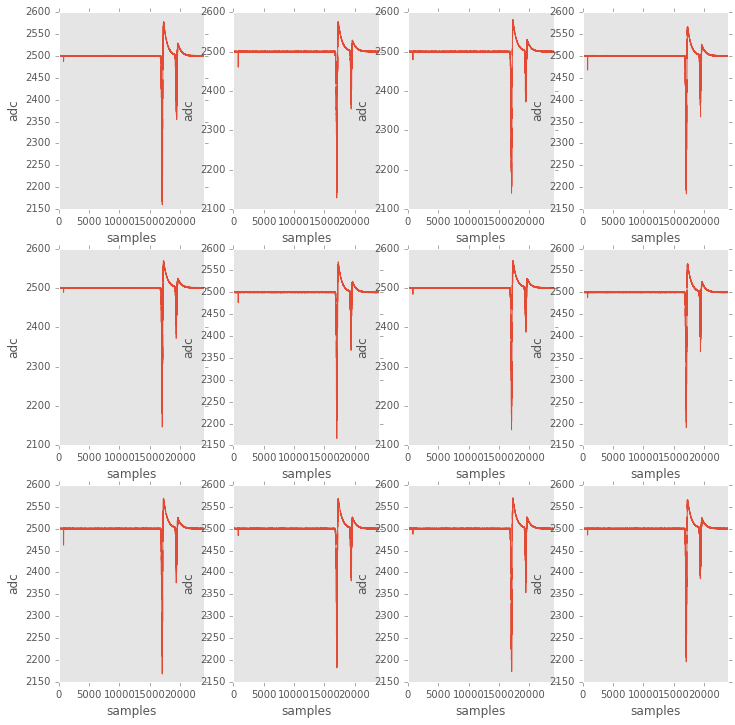

Press a key...


In [23]:
mpl.scan_waveforms(pmtrwf,list_of_events=[6])

### Profiling

In [29]:
!python -m cProfile -o ../../Prof/diomira_py_29_9_16.stat ../../Cities/DIOMIRA.py -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv

Debug level = INFO
input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_twf10_RWF.h5
first event = 0 last event = 10 nof events requested = 10 
Compression library = zlib Compression level = 1 
nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 
lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000
-->event number =0
-->event number =1
-->event number =2
-->event number =3
-->event number =4
-->event number =5
-->event number =6
-->event number =7
-->event number =8
-->event number =9
Leaving Diomira. Safe travels!


#### Examine pstats file

In [30]:
import pstats
p = pstats.Stats('../../Prof/diomira_py_29_9_16.stat')
p.sort_stats('time').print_stats(10)

Thu Sep 29 15:28:34 2016    ../../Prof/diomira_py_29_9_16.stat

         1546205 function calls (1536601 primitive calls) in 15.035 seconds

   Ordered by: internal time
   List reduced from 4802 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    29001    3.518    0.000    3.518    0.000 {numpy.core.multiarray.array}
     1560    2.199    0.001    2.199    0.001 {numpy.core.multiarray.correlate}
      120    2.192    0.018    2.192    0.018 {method 'normal' of 'mtrand.RandomState' objects}
      240    0.806    0.003    0.806    0.003 {scipy.signal.sigtools._linear_filter}
    18160    0.752    0.000    0.752    0.000 {method '_g_read_slice' of 'tables.hdf5extension.Array' objects}
     4297    0.710    0.000    0.710    0.000 {range}
       10    0.461    0.046    5.884    0.588 ../../Cities/DIOMIRA.py:116(twf_signal)
      120    0.292    0.002    3.298    0.027 /Users/jjgomezcadenas/Documents/Development/NEXT/IC/Sierpe/FEE2.py:

<pstats.Stats instance at 0x10e1fc908>

*1.5 seconds per event*

In [12]:
p = pstats.Stats('../../Cities/diomira_cy.stat')
p.sort_stats('time').print_stats(10)

Wed Sep 28 18:22:41 2016    ../../Cities/diomira_cy.stat

         4201039 function calls (4195156 primitive calls) in 6.866 seconds

   Ordered by: internal time
   List reduced from 4730 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   869070    1.461    0.000    1.461    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       36    0.681    0.019    0.681    0.019 {method 'normal' of 'mtrand.RandomState' objects}
      468    0.640    0.001    0.640    0.001 {numpy.core.multiarray.correlate}
   864039    0.631    0.000    2.529    0.000 /usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:1743(sum)
        3    0.492    0.164    3.097    1.032 {cyic.SensorsResponse.rebin_signal}
        7    0.264    0.038    0.264    0.038 {method '_fill_col' of 'tables.tableextension.Row' objects}
901747/901745    0.248    0.000    0.249    0.000 {isinstance}
        8    0.242    0.030    0.242    0.030 {method '_append_records'

<pstats.Stats instance at 0x115a0f9e0>

In [18]:
p = pstats.Stats('../../Cities/diomira_cy.stat')
p.sort_stats('time').print_stats(12)

Wed Sep 28 18:46:51 2016    ../../Cities/diomira_cy.stat

         4201171 function calls (4195288 primitive calls) in 6.751 seconds

   Ordered by: internal time
   List reduced from 4731 to 12 due to restriction <12>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   869070    1.329    0.000    1.329    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       36    0.676    0.019    0.676    0.019 {method 'normal' of 'mtrand.RandomState' objects}
      468    0.651    0.001    0.651    0.001 {numpy.core.multiarray.correlate}
   864039    0.624    0.000    2.369    0.000 /usr/local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:1743(sum)
       36    0.500    0.014    2.869    0.080 {cyic.SensorsResponse.rebin_pmt_array}
        7    0.264    0.038    0.264    0.038 {method '_fill_col' of 'tables.tableextension.Row' objects}
       72    0.248    0.003    0.248    0.003 {scipy.signal.sigtools._linear_filter}
        8    0.243    0.030    0.243    0.030 

<pstats.Stats instance at 0x115434b00>

### Cython version

In [ ]:
%env PYTHONPATH

In [6]:
%run ../../Cities/DIOMIRA.py -x -c ../../Config/DIOMIRA_NA_ZLIB_test2.csv 

INFO:root:Configuration Parameters (CFP) dictionary  = {'FIRST_EVT': 0, 'LAST_EVT': 3, 'FILE_OUT': 'WF_Na_ZLIB_test3_RWF.h5', 'PATH_OUT': '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/', ' END ': 1, 'CLIB': 'zlib', 'RUN_ALL': 1, 'PATH_IN': '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/', 'CLEVEL': 1, 'FILE_IN': 'WF_Na_1Kevts_comp1_chunk32k.h5'}


Configuration Parameters (CFP) dictionary  = {'FIRST_EVT': 0, 'LAST_EVT': 3, 'FILE_OUT': 'WF_Na_ZLIB_test3_RWF.h5', 'PATH_OUT': '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/', ' END ': 1, 'CLIB': 'zlib', 'RUN_ALL': 1, 'PATH_IN': '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/', 'CLEVEL': 1, 'FILE_IN': 'WF_Na_1Kevts_comp1_chunk32k.h5'}


Running Cython version of DIOMIRA
Debug level = INFO
INFO:root:input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_test3_RWF.h5


input path =/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/WF-NA-ZLIB/; output path = /Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/; file_in =WF_Na_1Kevts_comp1_chunk32k.h5 file_out =WF_Na_ZLIB_test3_RWF.h5


INFO:root:first event = 0 last event = 3 nof events requested = 3 


first event = 0 last event = 3 nof events requested = 3 


INFO:root:Compression library = zlib Compression level = 1 


Compression library = zlib Compression level = 1 


INFO:root:nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 


nof PMTs = 12 nof  SiPMs = 1792 nof events in input DST = 1000 


INFO:root:lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000


lof SiPM WF = 599999 lof PMT WF (MC) = 600 lof PMT WF (FEE) = 24000


INFO:root:-->event number =0


-->event number =0


INFO:root:truePMT shape =(12, 24000)


truePMT shape =(12, 24000)


INFO:root:dataPMT shape =(12, 24000)


dataPMT shape =(12, 24000)


INFO:root:-->event number =1


-->event number =1


INFO:root:truePMT shape =(12, 24000)


truePMT shape =(12, 24000)


INFO:root:dataPMT shape =(12, 24000)


dataPMT shape =(12, 24000)


INFO:root:-->event number =2


-->event number =2


INFO:root:truePMT shape =(12, 24000)


truePMT shape =(12, 24000)


INFO:root:dataPMT shape =(12, 24000)


dataPMT shape =(12, 24000)


Leaving Diomira. Safe travels!
         3841371 function calls (3841320 primitive calls) in 9.514 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   867033    1.881    0.000    1.881    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   864039    1.156    0.000    3.651    0.000 fromnumeric.py:1743(sum)
     5448    1.140    0.000    1.140    0.000 {method '_g_read_slice' of 'tables.hdf5extension.Array' objects}
      468    0.912    0.002    0.912    0.002 {numpy.core.multiarray.correlate}
       36    0.769    0.021    0.769    0.021 {method 'normal' of 'mtrand.RandomState' objects}
        3    0.702    0.234    4.857    1.619 {cyic.SensorsResponse.rebin_signal}
   864039    0.354    0.000    2.224    0.000 _methods.py:31(_sum)
        9    0.325    0.036    0.325    0.036 {method '_append' of 'tables.hdf5extension.Array' objects}
       72    0.293    0.004    0.293    0.004 {scipy.signal.sigtools._linear_filter}
   88

#### Running with zlib

In [ ]:
%less ../../Config/DIOMIRA_NA_ZLIB_test.csv

In [ ]:
%time %run ../../Cities/DIOMIRA.py  -c ../../Config/DIOMIRA_NA_ZLIB_test.csv 

In [ ]:
per_event = (2.*60 + 58)/100.
print('Zlib: time per event = {}'.format(per_event))

In [ ]:
ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_offset500_100_RWF.h5'

In [ ]:
per_event = 17./100.
print('ZLIB: memory per event = {} MB'.format(per_event))

In [ ]:
h5f =tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_offset500_100_RWF.h5', "r+") 

In [ ]:
pmttwf = h5f.root.RD.pmttwf

In [ ]:
plot_waveforms(pmttwf[0]) 

In [ ]:
pmtrwf = h5f.root.RD.pmtrwf

In [ ]:
plot_waveforms(pmtrwf[0]) 

In [ ]:
plot_waveforms(pmtrwf[99]) 

In [ ]:
h5f.close()

#### BLOSC

In [ ]:
%less ../../Config/DIOMIRA_NA_BLOSC_test2.csv

In [ ]:
%time %run ../../Cities/DIOMIRA.py  -c ../../Config/DIOMIRA_NA_BLOSC_test2.csv 

In [ ]:
per_event = (3.*60.)/100.
print('BLOSC: time per event = {} sec'.format(per_event))

In [ ]:
ls -lh '/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_BLOSC_float32_RWF.h5'

In [ ]:
per_event = 18./100.
print('BLOSC: memory per event = {} MB'.format(per_event))

In [ ]:
print(time.strftime("%H:%M:%S"))

In [ ]:
h5f =tables.open_file('/Users/jjgomezcadenas/Documents/Development/NEXT/data/Waveforms/25ns/WF_Na_ZLIB_offset500_RWF.h5', "r+")

In [ ]:
pmtrwf = h5f.root.RD.pmtrwf

In [ ]:
scan_waveforms(pmtrwf,list_of_events=range(1))

In [ ]:
h5f.close()